### Problem 1

In [11]:
import pooch
POOCH = pooch.create(
    path=pooch.os_cache("noaa-data"),
    # Use the figshare DOI
    base_url="doi:10.5281/zenodo.5553029/",
    registry={
        "HEADERS.txt": "md5:2a306ca225fe3ccb72a98953ded2f536",
        "CRND0103-2016-NY_Millbrook_3_W.txt": "md5:eb69811d14d0573ffa69f70dd9c768d9",
        "CRND0103-2017-NY_Millbrook_3_W.txt": "md5:b911da727ba1bdf26a34a775f25d1088",
        "CRND0103-2018-NY_Millbrook_3_W.txt": "md5:5b61bc687261596eba83801d7080dc56",
        "CRND0103-2019-NY_Millbrook_3_W.txt": "md5:9b814430612cd8a770b72020ca4f2b7d",
        "CRND0103-2020-NY_Millbrook_3_W.txt": "md5:cd8de6d5445024ce35fcaafa9b0e7b64"
    },
)



In [12]:

import pandas as pd

with open(POOCH.fetch("HEADERS.txt")) as fp:
    data = fp.read()
lines = data.split('\n')
headers = lines[1].split(' ')

dframes = []
for year in range(2016, 2019):
    fname = f'CRND0103-{year}-NY_Millbrook_3_W.txt'               
    df = pd.read_csv(POOCH.fetch(fname), parse_dates=[1],
                     names=headers, header=None, sep='\s+',
                     na_values=[-9999.0, -99.0])
    dframes.append(df)

df = pd.concat(dframes)
df = df.set_index('LST_DATE')
df


,WBANNO,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,SOLARAD_DAILY,...,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY,
LST_DATE,,,,,,,,,,,,,,,,,,,,,
2016-01-01,64756,2.422,-73.74,41.79,3.4,-0.5,1.5,1.3,0.0,1.69,...,0.233,0.204,0.155,0.147,4.2,4.4,5.1,6.0,7.6,NaN
2016-01-02,64756,2.422,-73.74,41.79,2.9,-3.6,-0.4,-0.3,0.0,6.25,...,0.227,0.199,0.152,0.144,2.8,3.1,4.2,5.7,7.4,NaN
2016-01-03,64756,2.422,-73.74,41.79,5.1,-1.8,1.6,1.1,0.0,5.69,...,0.223,0.196,0.151,0.141,2.6,2.8,3.8,5.2,7.2,NaN
2016-01-04,64756,2.422,-73.74,41.79,0.5,-14.4,-6.9,-7.5,0.0,9.17,...,0.220,0.194,0.148,0.139,1.7,2.1,3.4,4.9,6.9,NaN
2016-01-05,64756,2.422,-73.74,41.79,-5.2,-15.5,-10.3,-11.7,0.0,9.34,...,0.213,0.191,0.148,0.138,0.4,0.9,2.4,4.3,6.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,64756,2.622,-73.74,41.79,2.5,-2.1,0.2,0.3,0.0,7.50,...,0.275,0.248,0.191,0.192,1.3,1.4,1.9,3.2,4.7,NaN
2018-12-28,64756,2.622,-73.74,41.79,11.6,1.9,6.8,7.6,11.5,0.45,...,0.295,0.261,0.193,0.191,2.9,2.7,2.5,3.1,4.5,NaN
2018-12-29,64756,2.622,-73.74,41.79,11.3,-2.1,4.6,6.3,0.0,4.89,...,0.295,0.270,0.208,0.191,4.5,4.4,4.0,3.8,4.5,NaN


In [13]:

#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS!
#### (numpy arrays)  
#### NO PANDAS ALLOWED!
#########################################################

t_daily_min = df.T_DAILY_MIN.values
t_daily_max = df.T_DAILY_MAX.values
t_daily_mean = df.T_DAILY_MEAN.values
p_daily_calc = df.P_DAILY_CALC.values
soil_moisture_5 = df.SOIL_MOISTURE_5_DAILY.values
soil_moisture_10 = df.SOIL_MOISTURE_10_DAILY.values
soil_moisture_20 = df.SOIL_MOISTURE_20_DAILY.values
soil_moisture_50 = df.SOIL_MOISTURE_50_DAILY.values
soil_moisture_100 = df.SOIL_MOISTURE_100_DAILY.values
date = df.index.values
units = lines[2].split(' ')
for name, unit in zip(headers, units):
    print(f'{name}: {unit}')

WBANNO: XXXXX
LST_DATE: YYYYMMDD
CRX_VN: XXXXXX
LONGITUDE: Decimal_degrees
LATITUDE: Decimal_degrees
T_DAILY_MAX: Celsius
T_DAILY_MIN: Celsius
T_DAILY_MEAN: Celsius
T_DAILY_AVG: Celsius
P_DAILY_CALC: mm
SOLARAD_DAILY: MJ/m^2
SUR_TEMP_DAILY_TYPE: X
SUR_TEMP_DAILY_MAX: Celsius
SUR_TEMP_DAILY_MIN: Celsius
SUR_TEMP_DAILY_AVG: Celsius
RH_DAILY_MAX: %
RH_DAILY_MIN: %
RH_DAILY_AVG: %
SOIL_MOISTURE_5_DAILY: m^3/m^3
SOIL_MOISTURE_10_DAILY: m^3/m^3
SOIL_MOISTURE_20_DAILY: m^3/m^3
SOIL_MOISTURE_50_DAILY: m^3/m^3
SOIL_MOISTURE_100_DAILY: m^3/m^3
SOIL_TEMP_5_DAILY: Celsius
SOIL_TEMP_10_DAILY: Celsius
SOIL_TEMP_20_DAILY: Celsius
SOIL_TEMP_50_DAILY: Celsius
SOIL_TEMP_100_DAILY: Celsius
: 


Text(0, 0.5, 'Soil Moisture [m$^3$/m$^3$]')

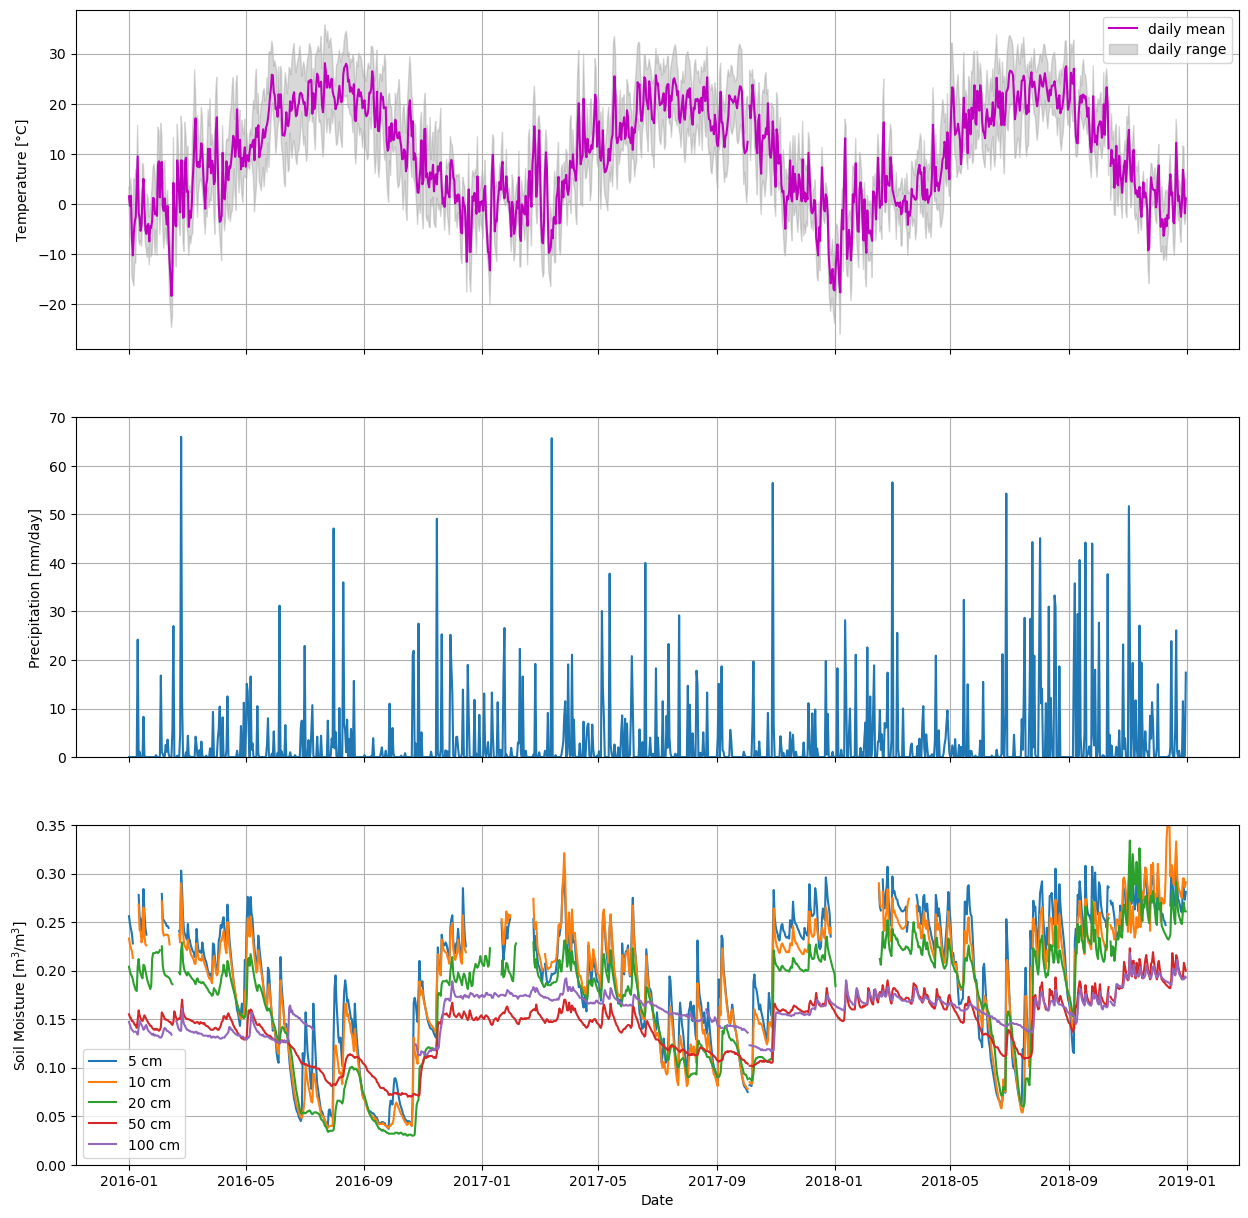

In [14]:
import matplotlib.pyplot as plt


fig,(ax1,ax2,ax3)=plt.subplots(3,sharex=True,figsize=(15,15))

ax1.plot(date,t_daily_mean,color='m',label='daily mean')
ax1.fill_between(date, t_daily_min, t_daily_max, color='grey', alpha=0.3, label='daily range')
ax1.legend(loc='upper right')
ax1.grid()
ax1.set_ylabel('Temperature [$\xb0$C]')

ax2.plot(date,p_daily_calc)
ax2.grid()
ax2.set_ylim([0,70])
ax2.set_ylabel('Precipitation [mm/day]')

ax3.plot(date,soil_moisture_5,label='5 cm')
ax3.plot(date,soil_moisture_10,label='10 cm')
ax3.plot(date,soil_moisture_20,label='20 cm')
ax3.plot(date,soil_moisture_50,label='50 cm')
ax3.plot(date,soil_moisture_100,label='100 cm')
ax3.grid()
ax3.legend(loc='lower left')
ax3.set_ylim([0,0.35])
ax3.set_xlabel('Date')
ax3.set_ylabel('Soil Moisture [m$^3$/m$^3$]')

### Problem 2:

In [15]:
import netCDF4
import xarray as xr
import numpy as np

ds_url = 'http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP-NCAR/.CDAS-1/.MONTHLY/.Diagnostic/.surface/.temp/dods'
ds = xr.open_dataset(ds_url, decode_times=False)

temp = ds.temp[-1].values - 273.15
lon = ds.X.values
lat = ds.Y.values

xx,yy=np.meshgrid(lon,lat)
temp_shape=temp.reshape((94,192))

Text(0.5, 0, 'Mean Temperature $°$C')

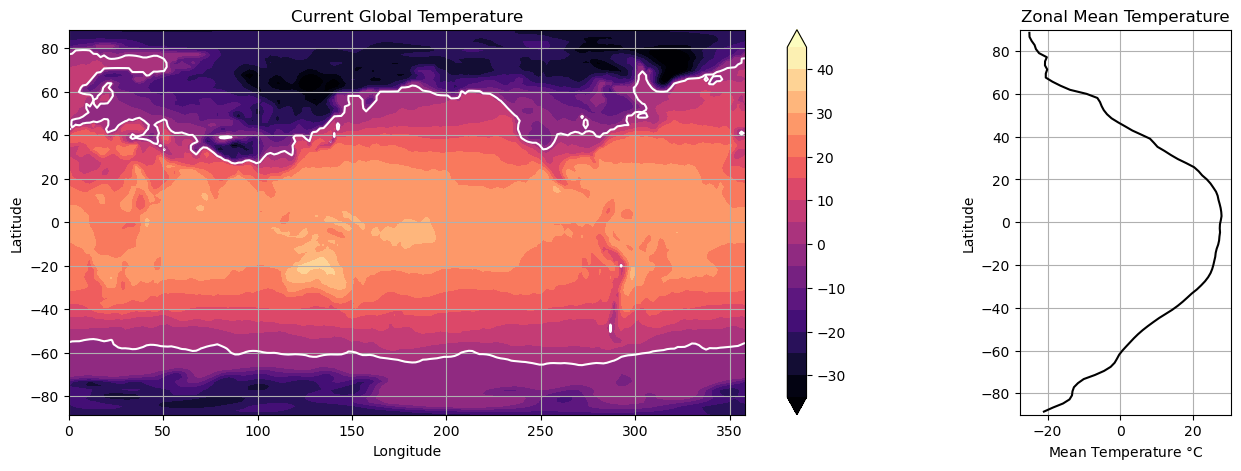

In [16]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5),gridspec_kw={'width_ratios': [4, 1]})
cs=ax1.contourf(xx,yy,temp_shape,cmap='magma',levels=[-35,-30,-25,-20,-15,-10,-5,0,5,10,15,20,25,30,35,40,45],extend='both')
M=np.nanmean(temp_shape,axis=1)
ax1.contour(xx,yy,temp_shape,levels=[0],colors='white',linestyles='solid')
fig.colorbar(cs)
ax1.grid()
ax1.set_title('Current Global Temperature')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax2.plot(M,lat,color='black')
ax2.grid()
ax2.set_ylim([-90,90])
ax2.set_title('Zonal Mean Temperature')
ax2.set_ylabel('Latitude')
ax2.set_xlabel('Mean Temperature $\xb0$C')


### Problem 3

In [17]:
import matplotlib as mlp

fname = pooch.retrieve(
    "https://rabernat.github.io/research_computing/signif.txt.tsv.zip",
    known_hash='22b9f7045bf90fb99e14b95b24c81da3c52a0b4c79acf95d72fbe3a257001dbb',
    processor=pooch.Unzip()
)[0]

earthquakes = np.genfromtxt(fname, delimiter='\t')
depth = earthquakes[:, 8]
magnitude = earthquakes[:, 9]
latitude = earthquakes[:, 20]
longitude = earthquakes[:, 21]

Text(0, 0.5, 'Latitude (°)')

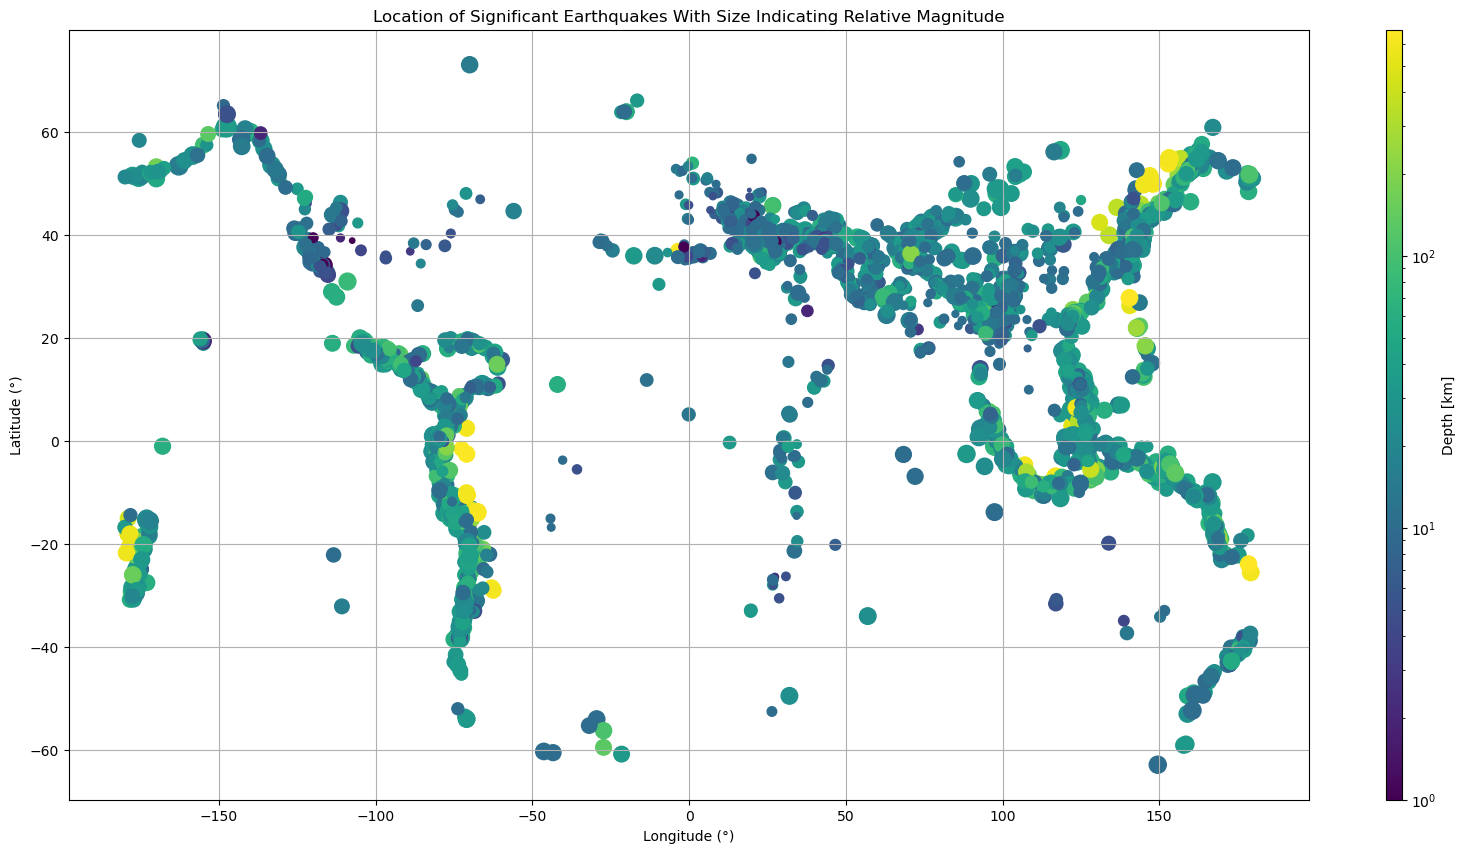

In [21]:
plt.figure(figsize=(20,10))
plt.grid()
plt.scatter(longitude,latitude,s=magnitude**2.4,c=depth,norm=mlp.colors.LogNorm())
plt.colorbar(label='Depth [km]',aspect=50)
plt.title('Location of Significant Earthquakes With Size Indicating Relative Magnitude')
plt.xlabel('Longitude (\xb0)')
plt.ylabel('Latitude (\xb0)')
